<a href="https://colab.research.google.com/github/DianaCamacho0/Diana-Camacho---Modelos/blob/main/Semana2/Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Cargar dataset de ocupacion de sitios de parqueo
data = pd.read_csv('SJ.csv')

In [28]:
# Revisar cabecera y cola del dataset
print(data.head())
print(data.tail())


      date  idCompany  numTrx
0  2022-08          1   68599
1  2022-09          1   86862
2  2022-10          1   99611
3  2022-11          1  109018
4  2022-12          1  115665
       date  idCompany  numTrx
13  2023-09          1  126851
14  2023-10          1  137539
15  2023-11          1  145327
16  2023-12          1  135537
17  2024-01          1  148111


In [29]:
# Formatear la columna de fecha como año y mes
data["date"] = pd.to_datetime(data["date"],format='%Y-%m')
data.head(3)

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611


In [30]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
data["date"].dt.month_name().unique()
data.head()

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [31]:
# Contar el numero de datos del dataset
data.count()

,0
date,18
idCompany,18
numTrx,18


In [32]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
data.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [33]:
# Revisar si el ldataset tiene datos nullos
data.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [34]:
# Establecer el campo fecha como index del dataframe
data = data.set_index('date')


In [35]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
data.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

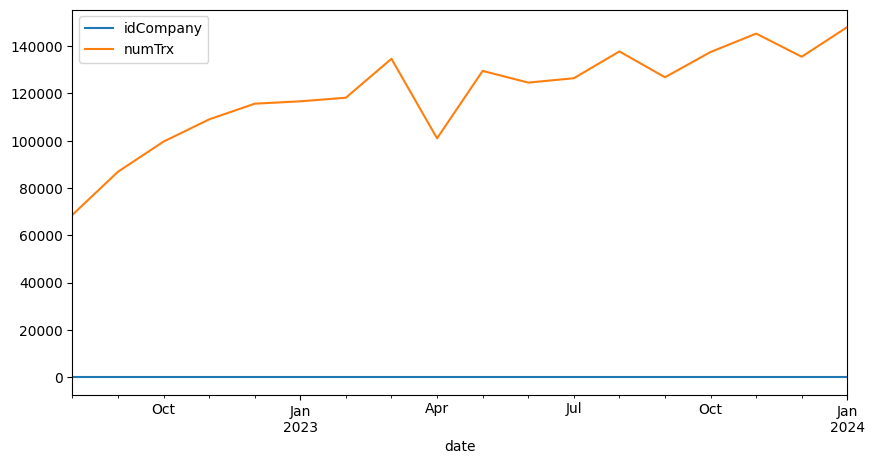

In [37]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
data.plot(figsize=(10,5))

In [38]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
data = data.drop(labels=['idCompany'], axis=1)

In [39]:
data.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [41]:
# Escalar entre -1 y 1 los datos de la variable a predecir
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_arr = scalar.fit_transform(data)

data_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [44]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento
step = 2
xtrain = []
ytrain = []
for i in range(step,len(data_arr)-step):
    xtrain.append(data_arr[i:i+step])
    ytrain.append(data_arr[i+step])

In [47]:
# Convertir las listas en arrays de numpy
ytrain = np.asanyarray(ytrain)
xtrain = np.asanyarray(xtrain)

In [48]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print(xtrain.shape)
print(ytrain.shape)

(14, 2, 1)
(14, 1)


In [50]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo


from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(LSTM(units=256,return_sequences=True,activation='relu',input_shape=(20,1)))
model.add(Dropout(0.7))
model.add(LSTM(units=128,return_sequences=True,activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=64,return_sequences=True,activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=32,return_sequences=True,activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=16,return_sequences=False,activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(64))
model.add(Dense(32))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 20, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 20, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,440 (2.02 MB)

 Trainable params: 529,440 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(loss='mse',optimizer='adam')

In [52]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16
history = model.fit(xtrain,ytrain,epochs=100,validation_split=0.1, batch_size=16,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.2864 - val_loss: 0.7292
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2840 - val_loss: 0.7246
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.2816 - val_loss: 0.7197
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.2791 - val_loss: 0.7147
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2763 - val_loss: 0.7094
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2735 - val_loss: 0.7039
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.2707 - val_loss: 0.6982
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.2681 - val_loss: 0.6923
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2647 - val_loss: 0.6861
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2614 - val_loss: 0.6796
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2586 - val_loss: 0.6729
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.2541 

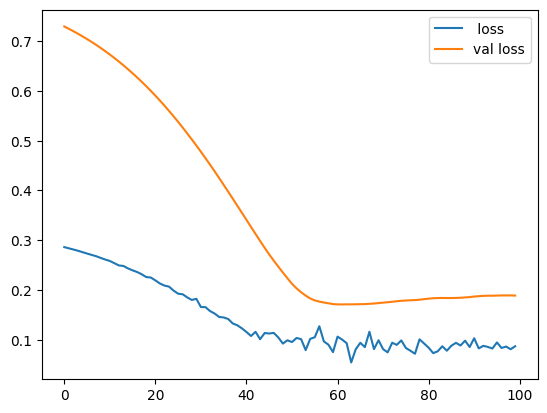

In [53]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend([' loss','val loss'])
plt.show()

In [68]:
# Guardar el modelo y salvarlo en disco
model.save('Forecasting Ocupacion.h5')

In [69]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular

N = 2
historical_data = data['numTrx'][:-1][-N:].values.reshape(-1, 1)
historical_data_scaled = scaler.transform(historical_data)
X_pred = historical_data_scaled.reshape(1, N, 1)
print(X_pred)
prediction_scaled = model.predict(X_pred)
prediction = scaler.inverse_transform(prediction_scaled)

[[[0.96498642]
  [0.84186035]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:

# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción
